In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
df = titanic.copy()

In [3]:
print(f"Number of rows in the titanic dataset are {df.shape[0]}.")
print(f"Number of columns in the titanic dataset are {df.shape[1]}.")

Number of rows in the titanic dataset are 891.
Number of columns in the titanic dataset are 12.


In [4]:
print("Columns of the data:")
df.columns

Columns of the data:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**As per the problem statement of the assignment we are supposed to use only the following columns from the dataset**
**They are Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare. So let us first remove the useless columns.**

In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
## checking the number of unique values in each of the features
for feature in df.columns:
    print(f"Number of unique values in the feature {feature} is {df[feature].nunique()}.")

Number of unique values in the feature Survived is 2.
Number of unique values in the feature Pclass is 3.
Number of unique values in the feature Sex is 2.
Number of unique values in the feature Age is 88.
Number of unique values in the feature SibSp is 7.
Number of unique values in the feature Parch is 7.
Number of unique values in the feature Fare is 248.


In [10]:
for feature in df.columns:
    print(feature)
    print()
    print(df[feature].unique())

Survived

[0 1]
Pclass

[3 1 2]
Sex

['male' 'female']
Age

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp

[1 0 3 4 2 5 8]
Parch

[0 1 2 5 3 4 6]
Fare

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.68

**Only the Age and Fare seems to be numerical features.**

C:\Users\shiva\AppData\Local\Temp\ipykernel_20572\3507739218.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_feats[i]],color="m")
C:\Users\shiva\AppData\Local\Temp\ipykernel_20572\3507739218.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_feats[i]],color="m")


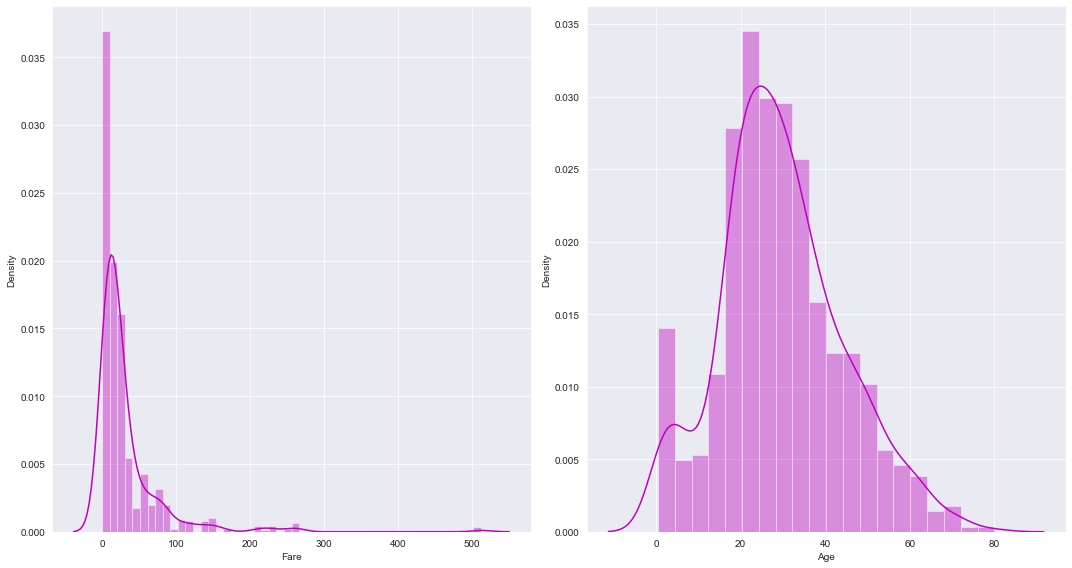

In [11]:
## Plotting the numberical columns to see their distribution
num_feats = ['Fare','Age']
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.distplot(df[num_feats[i]],color="m")

plt.tight_layout()

**Since the decision tree won't be affected by the outliers, we will leave these two numerical features as they are.**

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

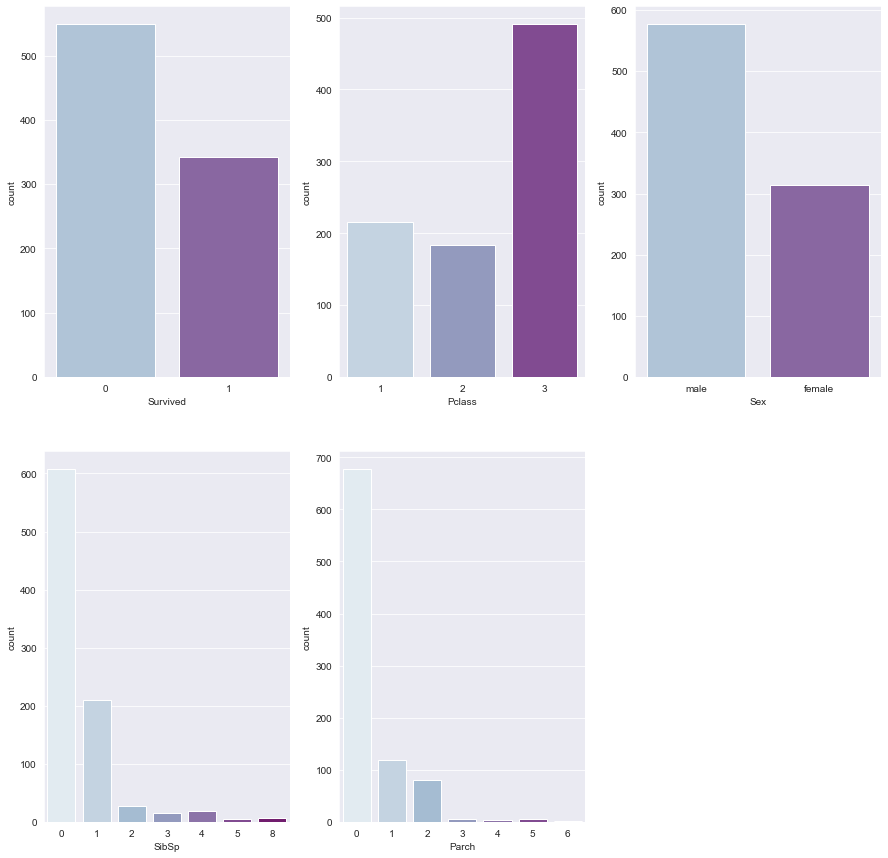

In [12]:
## creating a countplot for the categorical features
cat_feats = [feature for feature in df.columns if feature not in num_feats]
sns.set_style('darkgrid')
plt.figure(figsize=(15,15))
for i in range(len(cat_feats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=cat_feats[i], data=df,palette="BuPu")

plt.tight_layout

**The dataset seems to be unbalanced since the number of people survived is very small number when compared with the number of people died. So in order to offset this, one needs to use the stratifed splitting approach.**

In [13]:
## now let's check for missing values in the dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

**Age field seems to have lots of missing values. So in order to solve this issue, we will replace the missing values with the mean of non-null values. Since Age field doesn't have much outliers, we won't use median of non-null values for replacing the missing values in Age feature.**

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [15]:
## now again checking the missing values in the features 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

**Another thing that needs to be taken care of is encoding of the Sex feature.**

In [16]:
sex_feature_encode_dict = dict()
sex_feature_encode_dict['male'] = 0
sex_feature_encode_dict['female'] = 1
df['Sex'] = df['Sex'].map(sex_feature_encode_dict)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


**Preprocessing steps:**
1. Removing useless columns
2. Taking care of missing values
3. Encoding Sex feature